### Import libraries

Let's first import all the necessary libraries. I'll use `numpy` and `pandas` to start with. For visualization, I will use `pyplot` subpackage of `matplotlib`, use `rcParams` to add styling to the plots and `rainbow` for colors. For implementing Machine Learning models and processing of data, I will use the `sklearn` library.

In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

For processing the data, I'll import a few libraries. To split the available dataset for testing and training, I'll use the `train_test_split` method. To scale the features, I am using `StandardScaler`.

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Next, I'll import all the Machine Learning algorithms I will be using.
1. K Neighbors Classifier
2. Support Vector Classifier
3. Decision Tree Classifier
4. Random Forest Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Import dataset

Now that we have all the libraries we will need, I can import the dataset and take a look at it. The dataset is stored in the file `dataset.csv`. I'll use the pandas `read_csv` method to read the dataset.

In [57]:
dataset = pd.read_csv('dataset2.csv')

The dataset is now loaded into the variable `dataset`. I'll just take a glimpse of the data using the `desribe()` and `info()` methods before I actually start processing and visualizing it.

In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


Looks like the dataset has a total of 303 rows and there are no missing values. There are a total of `13 features` along with one target value which we wish to find.

In [59]:
dataset.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


The scale of each feature column is different and quite varied as well. While the maximum for `age` reaches 77, the maximum of `chol` (serum cholestoral) is 564.

### Understanding the data

Now, we can use visualizations to better understand our data and then look at any processing we might want to do.

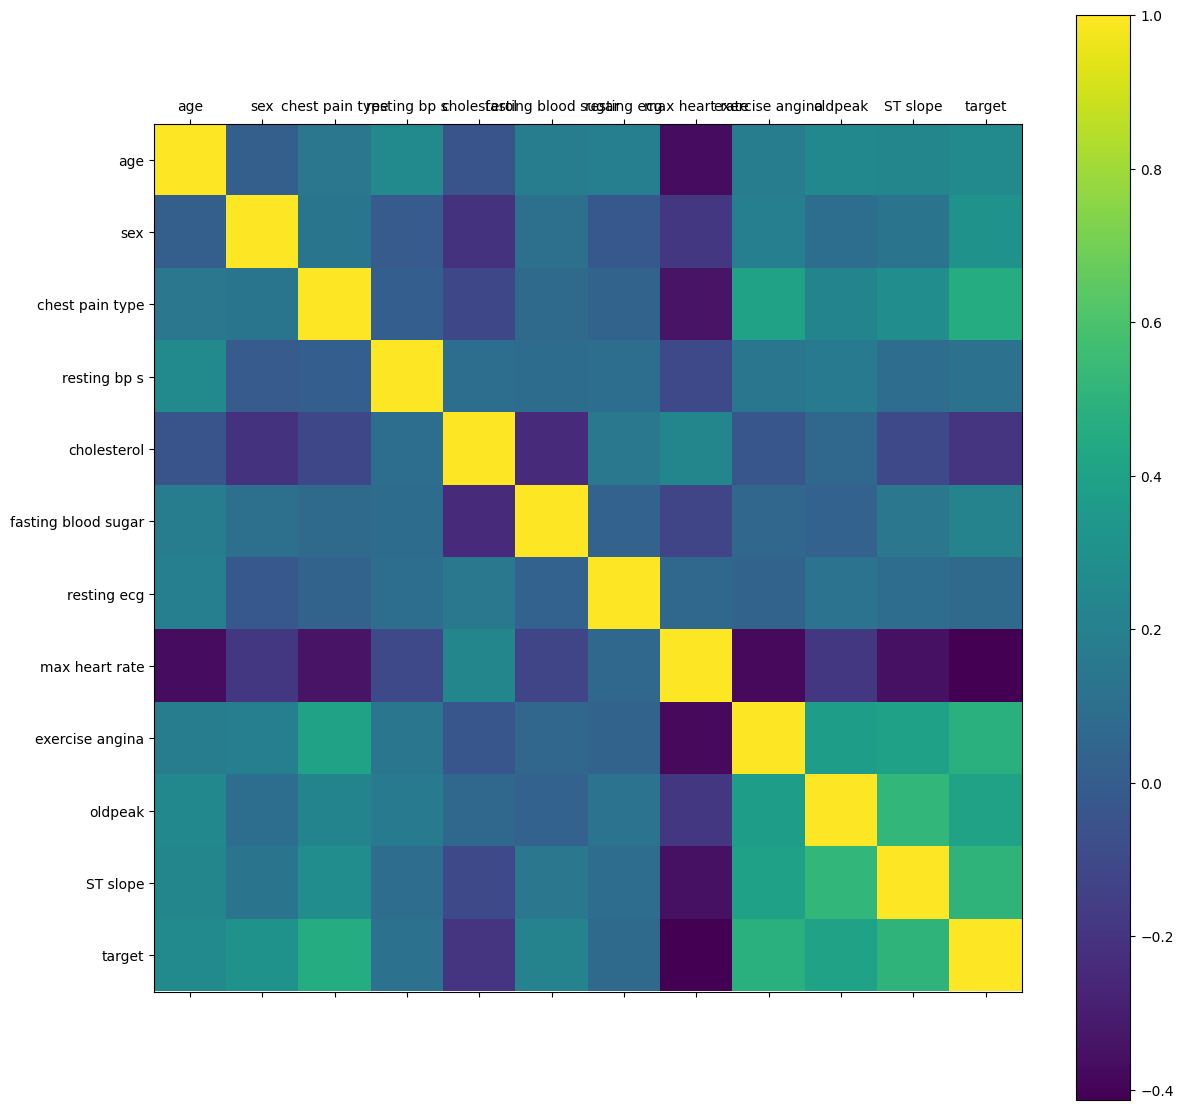

In [60]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

Taking a look at the correlation matrix above, it's easy to see that a few features have negative correlation with the target value while some have positive.
Next, I'll take a look at the histograms for each variable.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest pain type'}>],
       [<Axes: title={'center': 'resting bp s'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting blood sugar'}>],
       [<Axes: title={'center': 'resting ecg'}>,
        <Axes: title={'center': 'max heart rate'}>,
        <Axes: title={'center': 'exercise angina'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ST slope'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

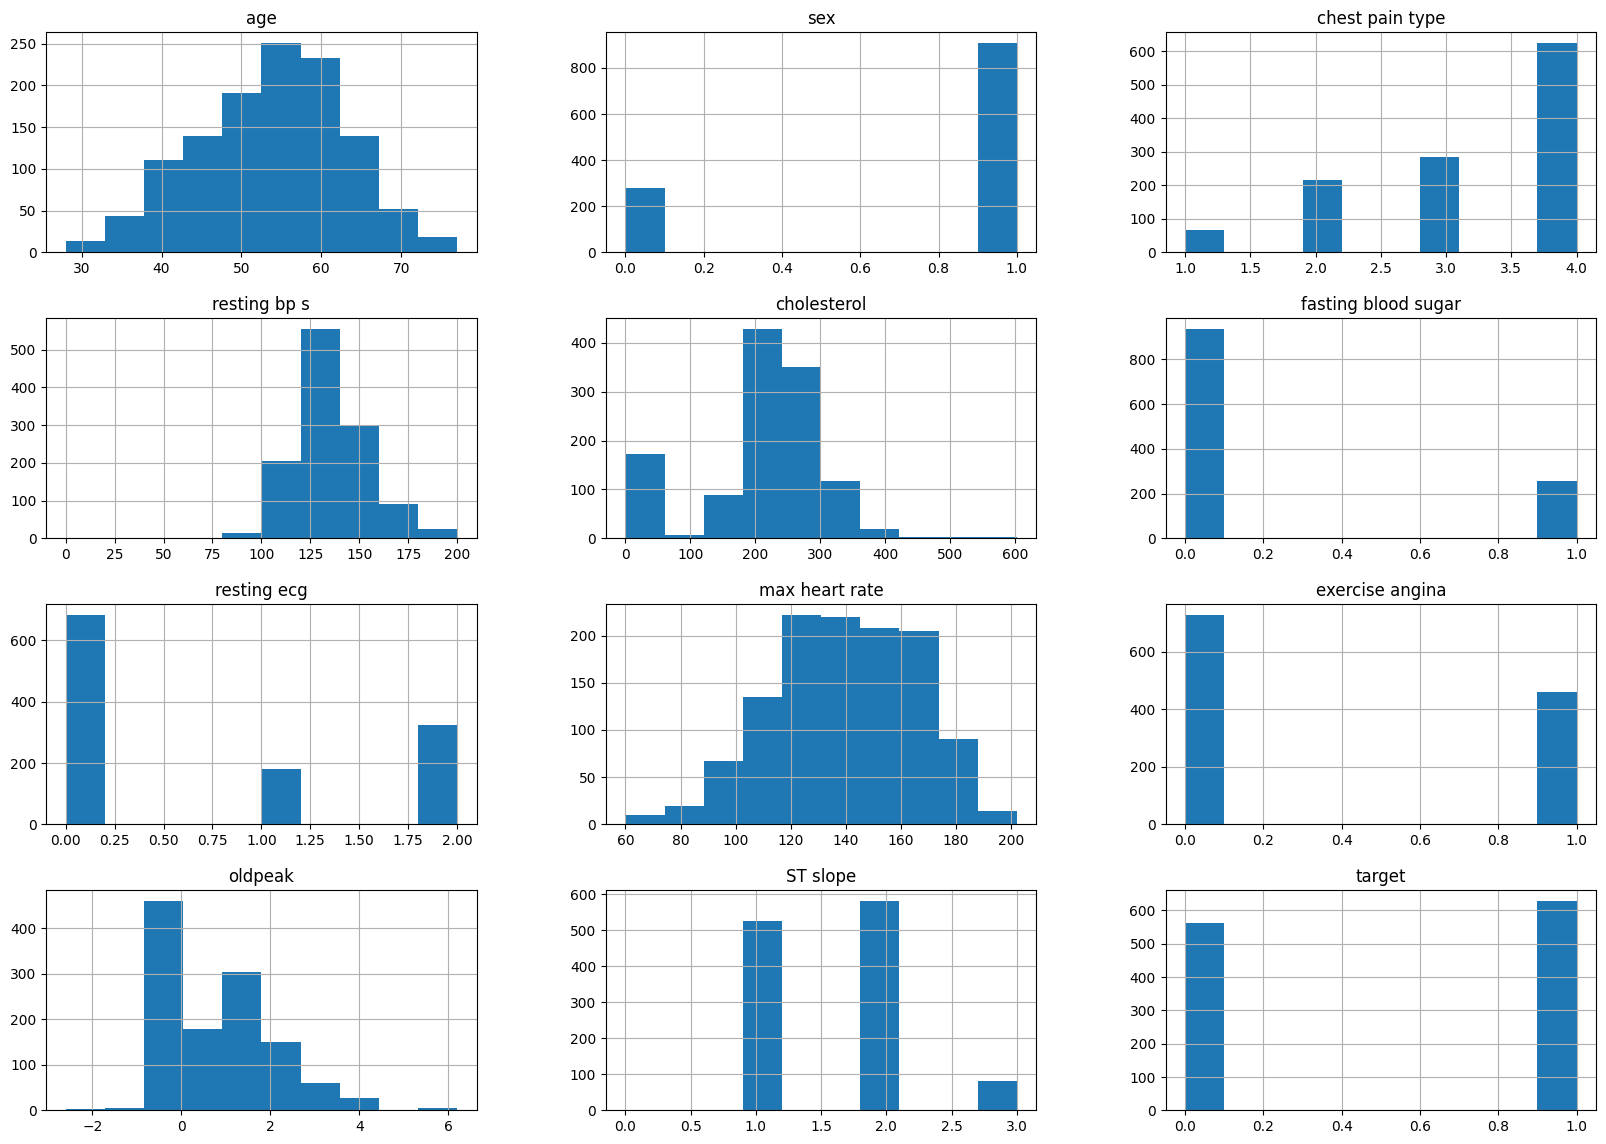

In [61]:
dataset.hist()

Taking a look at the histograms above, I can see that each feature has a different range of distribution. Thus, using scaling before our predictions should be of great use. Also, the categorical features do stand out.

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

Text(0.5, 1.0, 'Count of each Target Class')

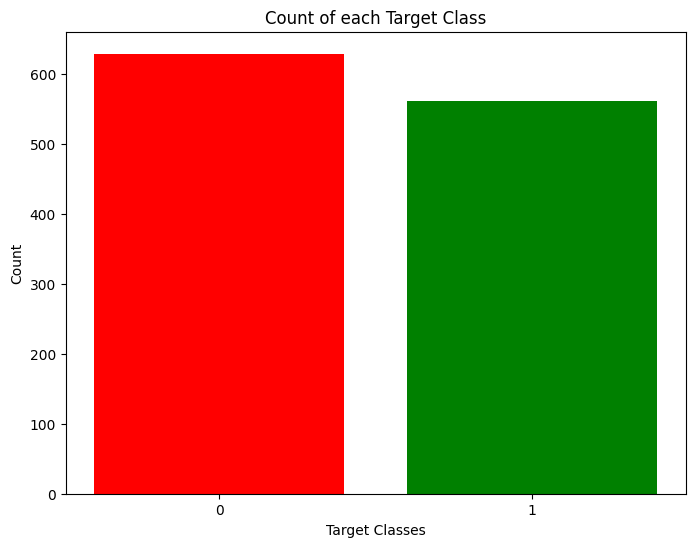

In [62]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

The two classes are not exactly 50% each but the ratio is good enough to continue without dropping/increasing our data.

### Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [63]:
print("All column names:")
print(dataset.columns)

# Separate target variable and features
target = dataset['target']
features = dataset.drop('target', axis=1)

# Group columns by their prefix
column_groups = {}
for col in features.columns:
    prefix = col.split('_')[0]
    if prefix not in column_groups:
        column_groups[prefix] = []
    column_groups[prefix].append(col)

# Print the groups
print("\nColumn groups:")
for prefix, columns in column_groups.items():
    print(f"{prefix}: {columns}")

# Identify numerical columns (assuming 'age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak')
numerical_prefixes = ['age', 'resting', 'cholesterol', 'max', 'oldpeak']
numerical_columns = [col for prefix in numerical_prefixes for col in column_groups.get(prefix, [])]

# Standardize the numerical columns
scaler = StandardScaler()
features[numerical_columns] = scaler.fit_transform(features[numerical_columns])

# Combine standardized features with target
dataset_processed = pd.concat([features, target], axis=1)

# Display the first few rows of the processed dataset
print("\nFirst few rows of the processed dataset:")
print(dataset_processed.head())

# Display basic statistics of the processed dataset
print("\nBasic statistics of the processed dataset:")
print(dataset_processed.describe())

# Optional: Correlation matrix of numerical columns
correlation_matrix = dataset_processed[numerical_columns + ['target']].corr()
print("\nCorrelation matrix of numerical columns:")
print(correlation_matrix)

All column names:
Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

Column groups:
age: ['age']
sex: ['sex']
chest pain type: ['chest pain type']
resting bp s: ['resting bp s']
cholesterol: ['cholesterol']
fasting blood sugar: ['fasting blood sugar']
resting ecg: ['resting ecg']
max heart rate: ['max heart rate']
exercise angina: ['exercise angina']
oldpeak: ['oldpeak']
ST slope: ['ST slope']

First few rows of the processed dataset:
        age  sex  chest pain type  resting bp s  cholesterol  \
0 -1.466728    1                2           140     0.775674   
1 -0.504600    0                3           160    -0.299512   
2 -1.787437    1                2           130     0.716489   
3 -0.611503    0                4           138     0.035867   
4  0.029915    1                3           150    -0.151550   

   fasting

Now, I will use the `StandardScaler` from `sklearn` to scale my dataset.

The data is not ready for our Machine Learning application.

### Machine Learning

I'll now import `train_test_split` to split our dataset into training and testing datasets. Then, I'll import all Machine Learning models I'll be using to train and test the data.

In [64]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

#### K Neighbors Classifier

The classification score varies based on different values of neighbors that we choose. Thus, I'll plot a score graph for different values of K (neighbors) and check when do I achieve the best score.

In [65]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

I have the scores for different neighbor values in the array `knn_scores`. I'll now plot it and see for which value of K did I get the best scores.

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

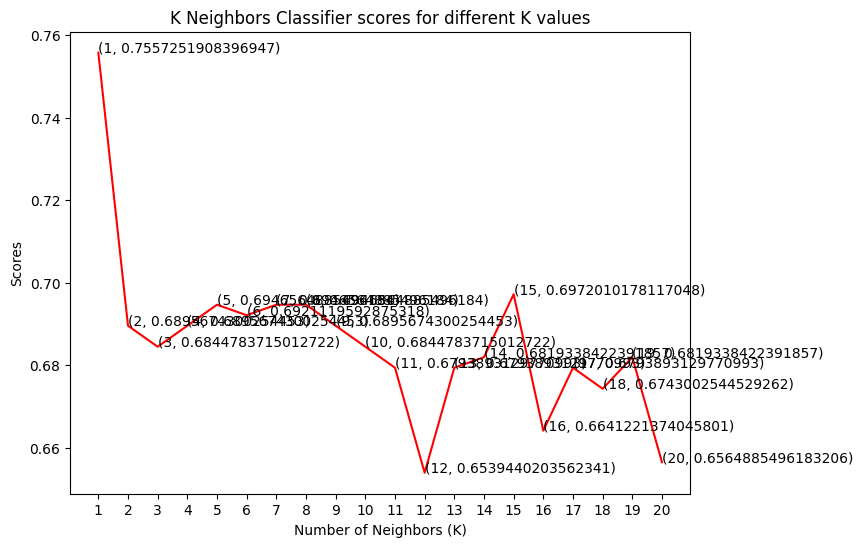

In [66]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

From the plot above, it is clear that the maximum score achieved was `0.87` for the 8 neighbors.

In [67]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[7]*100, 8))

The score for K Neighbors Classifier is 69.46564885496184% with 8 nieghbors.


#### Support Vector Classifier

There are several kernels for Support Vector Classifier. I'll test some of them and check which has the best score.

In [68]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

I'll now plot a bar plot of scores for each kernel and see which performed the best.

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

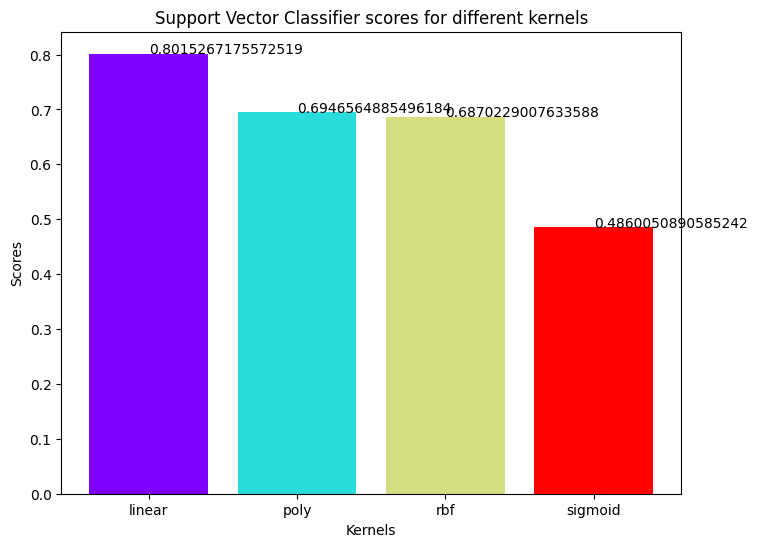

In [69]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

The `linear` kernel performed the best, being slightly better than `rbf` kernel.

In [70]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

The score for Support Vector Classifier is 80.1526717557252% with linear kernel.


#### Decision Tree Classifier

Here, I'll use the Decision Tree Classifier to model the problem at hand. I'll vary between a set of `max_features` and see which returns the best accuracy.

In [71]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

I selected the maximum number of features from 1 to 30 for split. Now, let's see the scores for each of those cases.

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

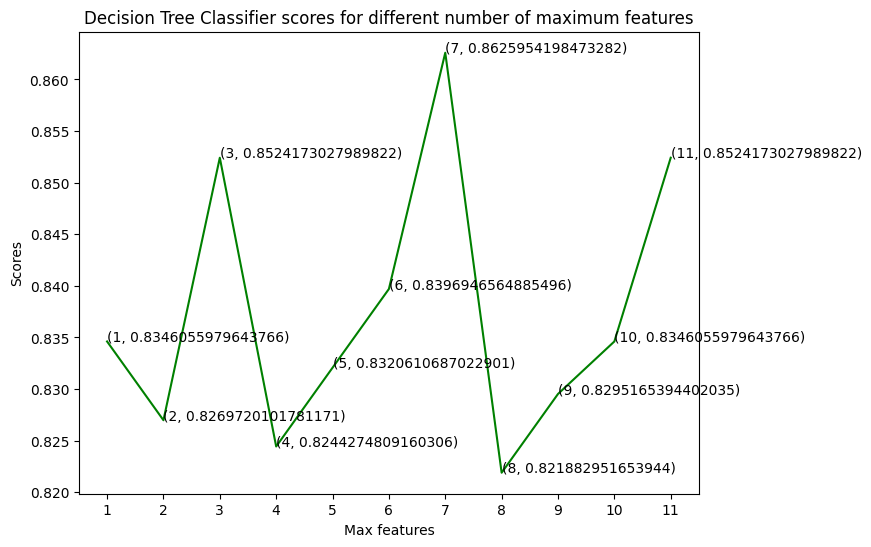

In [72]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

The model achieved the best accuracy at three values of maximum features, `2`, `4` and `18`.

In [73]:
print("The score for Decision Tree Classifier is {:.2f}% with {} maximum features.".format(
    dt_scores[-1] * 100, 
    [2, 4, 18]
))
max_features = [2, 4, 18]
for score, feature in zip(dt_scores, max_features):
    print("The score for Decision Tree Classifier is {:.2f}% with {} maximum features.".format(
        score * 100, 
        feature
    ))

The score for Decision Tree Classifier is 85.24% with [2, 4, 18] maximum features.
The score for Decision Tree Classifier is 83.46% with 2 maximum features.
The score for Decision Tree Classifier is 82.70% with 4 maximum features.
The score for Decision Tree Classifier is 85.24% with 18 maximum features.


#### Random Forest Classifier

Now, I'll use the ensemble method, Random Forest Classifier, to create the model and vary the number of estimators to see their effect.

In [74]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

The model is trained and the scores are recorded. Let's plot a bar plot to compare the scores.

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

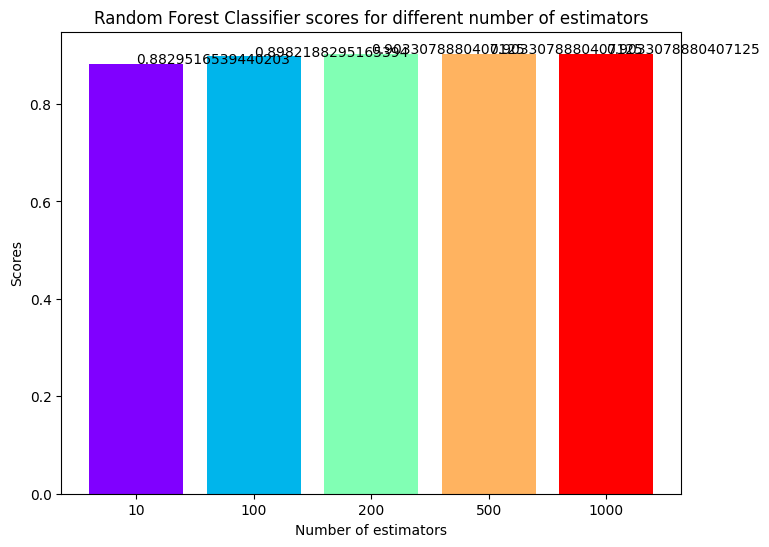

In [75]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

The maximum score is achieved when the total estimators are 100 or 500.

In [76]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [100, 500]))

The score for Random Forest Classifier is 89.82188295165395% with [100, 500] estimators.


saving the model


In [77]:
import pickle

# Save the trained model to a file using pickle
with open('saved_model.pkl', 'wb') as file:
    pickle.dump( rf_classifier, file)

print("Model saved as 'saved_model.pkl'")


Model saved as 'saved_model.pkl'


### Conclusion

In this project, I used Machine Learning to predict whether a person is suffering from a heart disease. After importing the data, I analysed it using plots. Then, I did generated dummy variables for categorical features and scaled other features. 
I then applied four Machine Learning algorithms, `K Neighbors Classifier`, `Support Vector Classifier`, `Decision Tree Classifier` and `Random Forest Classifier`. I varied parameters across each model to improve their scores.
In the end, `K Neighbors Classifier` achieved the highest score of `87%` with `8 nearest neighbors`.